<a href="https://colab.research.google.com/github/ReefAmarin/GoogleRecaptchav3-example-In-asp.net/blob/master/Session5__Vector_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/Session5_Exercise.csv')
df

,CityIndex,Temperature
0,1,1.81
1,2,4.01
2,3,5.45
3,4,7.37
4,5,9.04
5,6,11.74
6,7,13.21
7,8,13.08
8,9,15.42
9,10,20.68


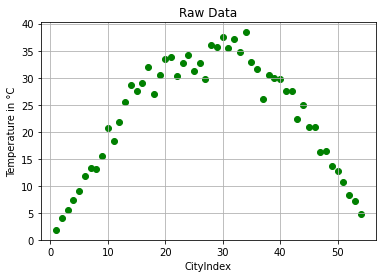

In [3]:
X = df['CityIndex'].values
Y = df['Temperature'].values
plt.scatter(X,Y,color = 'g')
plt.grid()
plt.xlabel('CityIndex')
plt.ylabel('Temperature in °C')
plt.title('Raw Data')
plt.show()

In [18]:
train_test_split(X,y,test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=10)
X_train, X_test, y_train, y_test

(array([[35],
        [ 8],
        [ 7],
        [43],
        [ 3],
        [52],
        [44],
        [11],
        [38],
        [28],
        [19],
        [ 5],
        [ 2],
        [13],
        [49],
        [23],
        [31],
        [48],
        [20],
        [33],
        [ 6],
        [14],
        [15],
        [45],
        [34],
        [25],
        [12],
        [42],
        [17],
        [53],
        [41],
        [51],
        [54],
        [ 9],
        [47],
        [30],
        [26],
        [29],
        [50],
        [ 1],
        [16],
        [37],
        [10]]), array([[21],
        [ 4],
        [46],
        [18],
        [32],
        [36],
        [40],
        [27],
        [22],
        [39],
        [24]]), array([32.83, 13.08, 13.21, 22.37,  5.45,  8.3 , 24.91, 18.22, 30.57,
        36.07, 30.48,  9.04,  4.01, 25.51, 13.7 , 32.72, 35.48, 16.39,
        33.46, 34.84, 11.74, 28.68, 27.49, 20.92, 38.41, 31.31, 21.8 ,
        27.55, 31.96,  7.24, 

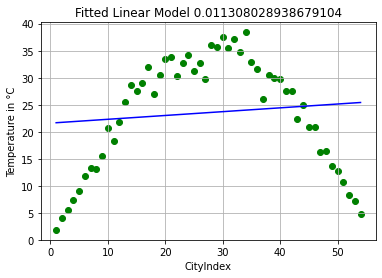

In [28]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
regressorObj = LinearRegression()
regressorObj.fit(x,y)
y_pred = regressorObj.predict(x)


plt.scatter(X,y,color = 'g', label = 'Raw Data')
plt.plot(X,regressorObj.predict(x), color = 'blue', label = 'Predicted Linear Model')
plt.grid()
plt.xlabel('CityIndex')
plt.ylabel('Temperature in °C')
plt.title(f'Fitted Linear Model {r2_score(y, y_pred)}')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


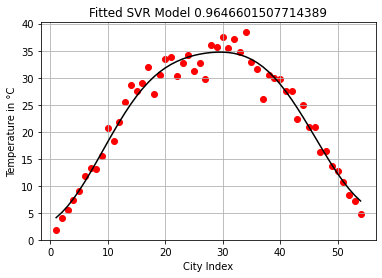

In [29]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = y.reshape(len(y),1)
y = sc_y.fit_transform(y)

regressor  = SVR(kernel = 'rbf')
regressor.fit(X,y)
y_pred = regressor.predict(X)

plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'r', label = 'Raw Data')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'k', label = 'Predicted SVR')
plt.grid()
plt.xlabel('City Index')
plt.ylabel('Temperature in °C')
plt.title(f'Fitted SVR Model {r2_score(y, y_pred)}')
plt.show()

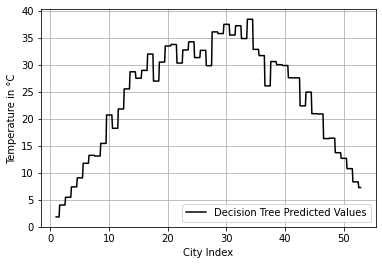

In [26]:
regressor = DecisionTreeRegressor()
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
regressor.fit(X,y)

X_grid = np.arange(1, 53,0.1)
X_grid = X_grid.reshape(len(X_grid),1)
y_pred = regressor.predict(X_grid)

plt.plot(X_grid,y_pred, color = 'k', label = 'Decision Tree Predicted Values')
plt.grid()
plt.xlabel('City Index')
plt.ylabel('Temperature in °C')

plt.legend()
plt.show()

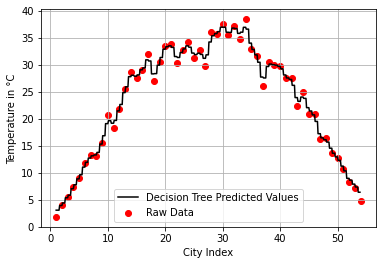

In [27]:
regressor = RandomForestRegressor(n_estimators = 100)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
regressor.fit(x,y)

X_grid = np.arange(np.min(X), np.max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
y_pred = regressor.predict(X_grid)

plt.scatter(x,y,color = 'r', label = 'Raw Data')

plt.plot(X_grid,y_pred, color = 'k', label = 'Decision Tree Predicted Values')
plt.grid()
plt.xlabel('City Index')
plt.ylabel('Temperature in °C')

plt.legend()
plt.show()